# Crypto Analysis

Eric Hedgren, Gavin Fisher, and Blake Nelson

In [ ]:
from sklearn.neural_network import MLPRegressor
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

training_percent = 0.86

def get_market_data(ticker="BTC-USD", period="max"):
    crypto = yf.Ticker(ticker)
    data = crypto.history(period=period)
    data.reset_index(inplace=True)
    data = data.rename(columns={"Close": "price", "Date": "timestamp"})
    return data

def prepare_data(df):
    df['price_next'] = df['price'].shift(-1)
    df = df.dropna()

    train_size = int(len(df) * training_percent)
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]

    X_train = train_df[['price']]
    y_train = train_df['price_next']
    X_test = test_df[['price']]
    y_test = test_df['price_next']
    
    return X_train, y_train, X_test, y_test, test_df

def train_models(X_train, y_train, X_test, y_test, 
                   epochs=100, learning_rate=0.001, hardware='CPU'):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'SVR': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = np.mean((y_test - y_pred) ** 2)
        rmse = np.sqrt(mse)
        results[name] = (model, rmse, y_pred, mse)

    neural_network = MLPRegressor(max_iter=epochs, learning_rate_init=learning_rate)
    neural_network.fit(X_train, y_train)
    y_pred = neural_network.predict(X_test)
    mse = np.mean((y_test - y_pred) ** 2)
    rmse = np.sqrt(mse)
    results['Neural Network'] = (neural_network, rmse, y_pred, mse)

    return results

def predict_tomorrow(models, df):
    last_price = df['price'].iloc[-1]
    predictions = {}
    for name, (model, _, _, _) in models.items():
        pred = model.predict([[last_price]])[0]
        predictions[name] = pred
    return predictions

def plot_data(df, models):
    colors = ['b', 'g', 'r', 'c', 'm', 'orange']
    fig, axs = plt.subplots(len(models), figsize=(12,6*len(models)))
    
    mses = []
    model_names = []
    
    for i, (name, (model, rmse, y_pred, mse)) in enumerate(models.items()):
        axs[i].plot(df['timestamp'][:int(training_percent*len(df))], df['price'][:int(training_percent*len(df))], label='Actual Price', color='k')

        axs[i].plot(df['timestamp'].iloc[-len(y_pred):], y_pred, label=name, color=colors[i])
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Price (USD)')
        axs[i].set_title(f'{name} Model')
        axs[i].legend()
        
        mses.append(mse)
        model_names.append(name)
    
    fig, ax = plt.subplots()
    ax.bar(model_names, mses, color=colors)
    ax.set_xlabel('Model')
    ax.set_ylabel('Mean Squared Error (MSE)')
    ax.set_title('Model Performance Comparison')
    ax.tick_params(axis='x', rotation=90)
    plt.show()

    plt.tight_layout()
    plt.show()

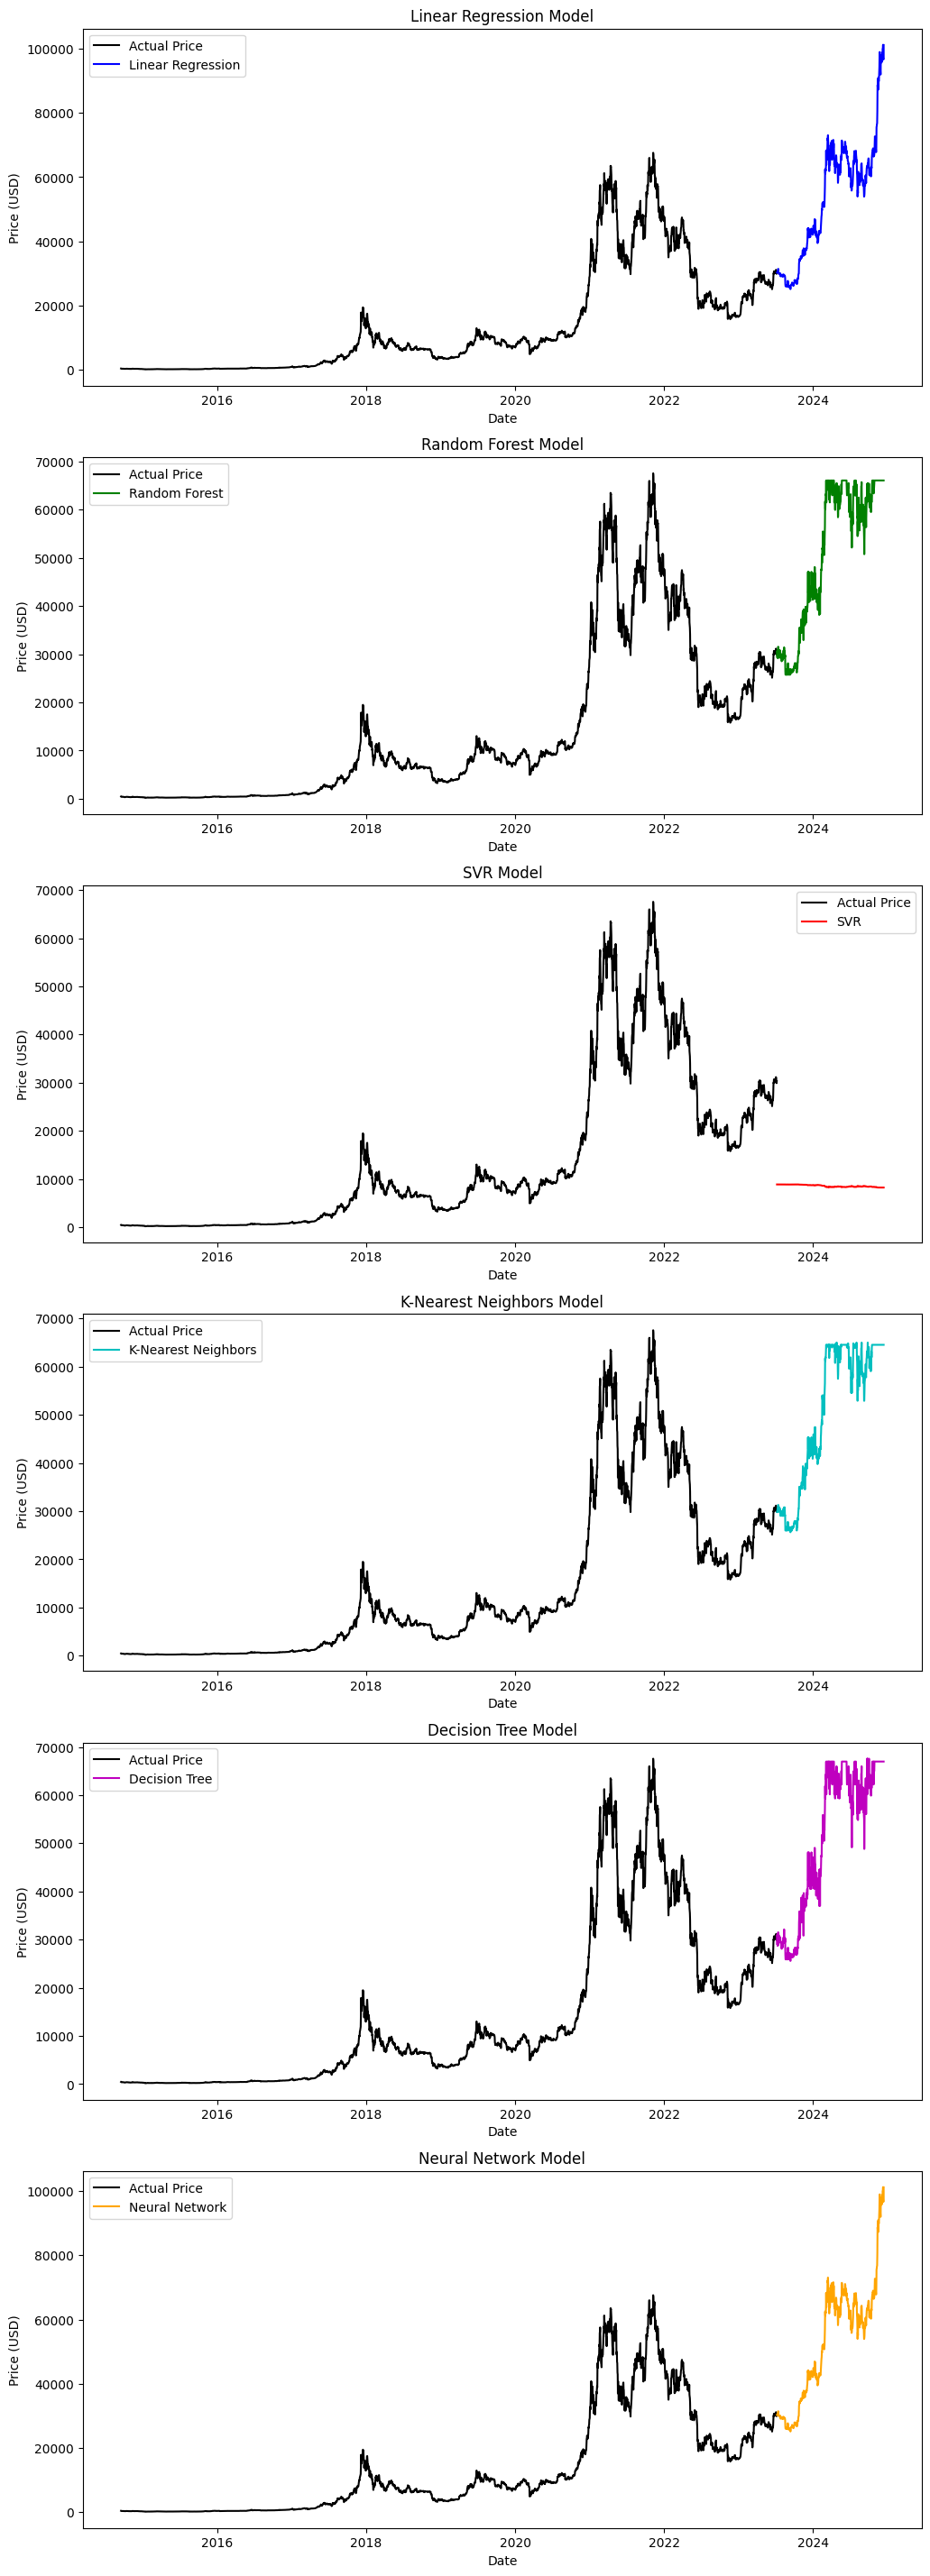

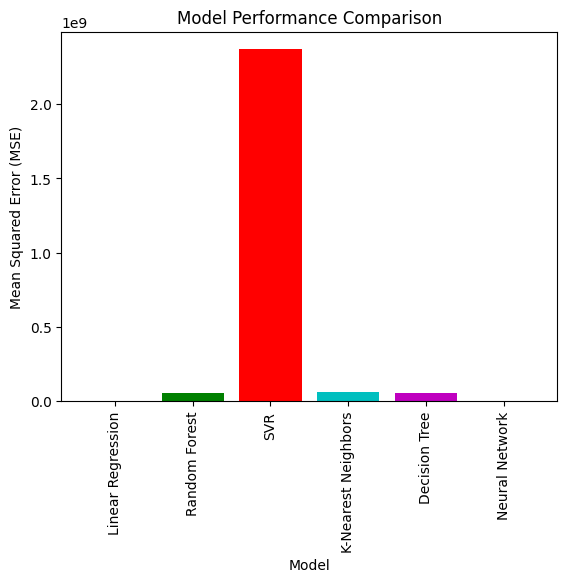

<Figure size 640x480 with 0 Axes>

In [13]:
df = get_market_data()

X_train, y_train, X_test, y_test, test_df = prepare_data(df)

models = train_models(X_train, y_train, X_test, y_test)

plot_data(df, models)

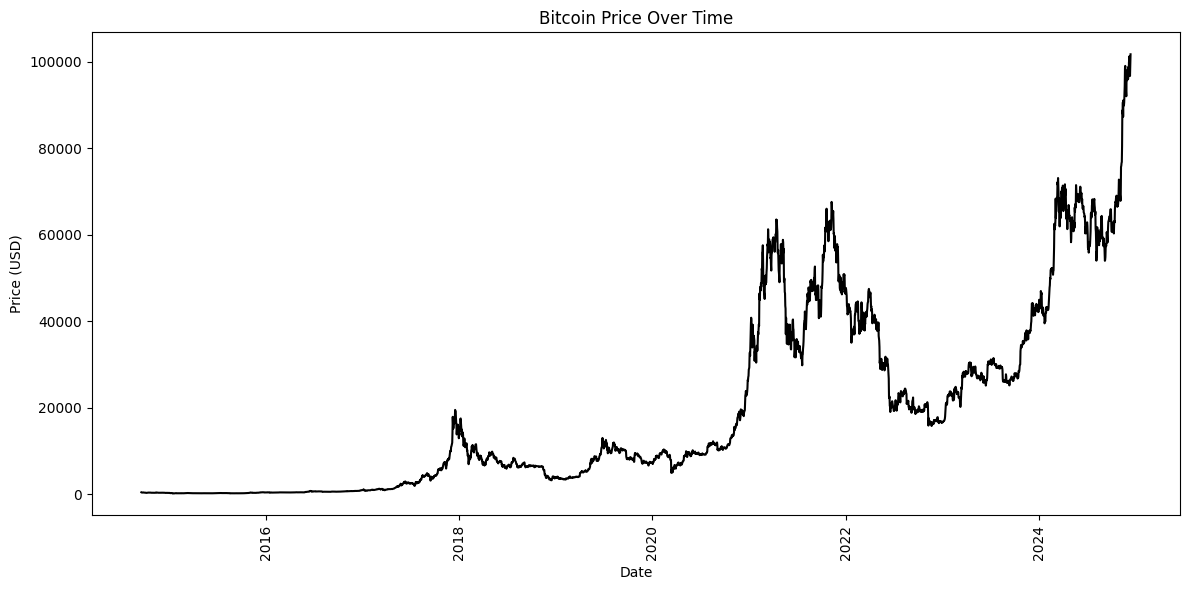

In [97]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['timestamp'], df['price'], label='Actual Price', color='k')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('Bitcoin Price Over Time')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()